## Aproximação Polinomial

### Introdução Teórica

Considere um polinômio de grau 𝑝 conforme representado na sua forma geral na Equação 0.1.
𝑝(𝑥) = 𝑤𝑝𝑥
𝑝 + 𝑤𝑝−1𝑥
𝑝−1 + · · · + 𝑤1𝑥 + 𝑤0 
em que 𝑥 é o argumento e 𝑤𝑖 é o coeficiente do termo de grau 𝑖.

#### Exercício 1
Obtenha aproximações polinomiais da função geradora **𝑓𝑔(𝑥) = 1/2𝑥^2 + 3𝑥 + 10**
somadas com um ruído gaussiano 𝑁(𝑚𝑒𝑎𝑛 = 0, 𝑠𝑑 = 4) amostradas entre 𝑥 = −15
e 𝑥 = 10, com um número de amostras 𝑁 = 10 e grau do polinônimo variando
entre 𝑝 = 1 a 𝑝 = 8. Para cada aproximação, mostre um gráfico com a função
geradora, as amostras e a curva do polinômio obtido. como na figura de exemplo
abaixo:
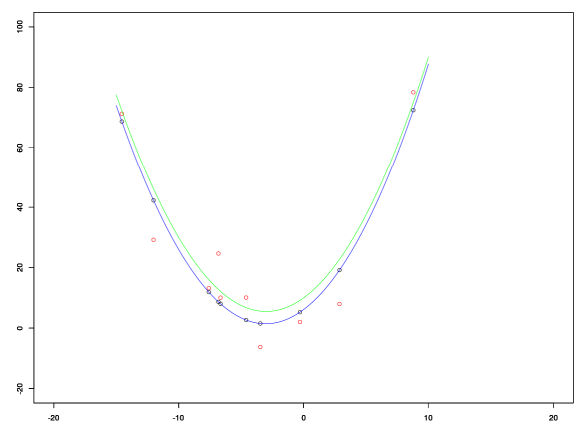

##### Nos slides de aula, foi feito o códgio abaixo. Por estar em R realizei algumas adaptações para que fosse possível a execução em python.



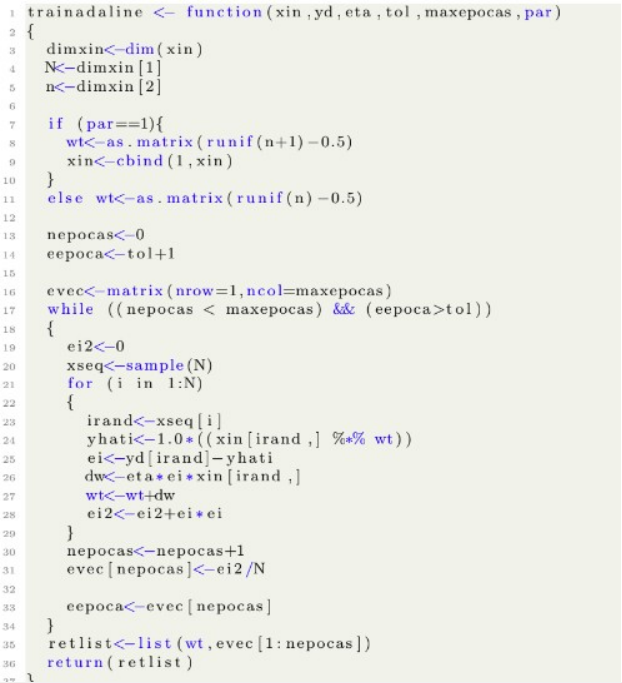

In [1]:
# Importando bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [8]:
# Definindo a classe do modelo
# Será utilizado o modelo linear Adaline. Como mostrado em aula, o modelo é caracterizado pelas equações Xw=Y 
# como descrito também no enunciado da atividade

class Adaline:
    # Construtor passando self e os atributos
    def __init__(self, eta=0.01, tol=1e-5, max_epocas=100):
        self.eta = eta
        self.tol = tol
        self.max_epocas = max_epocas
        self.w = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.random.uniform(low=-0.5, high=0.5, size=(n_features + 1,))

        X_b = np.column_stack([np.ones((n_samples, 1)), X])

        epoca = 0
        while epoca < self.max_epocas:
            erro_quad_medio = 0
            for i in range(n_samples):
                y_pred = self.predict(X[i])
                erro = (y[i] - y_pred)
                self.w[1:] += self.eta * erro * X[i]
                self.w[0] += self.eta * erro
                erro_quad_medio += erro**2
            erro_quad_medio /= n_samples
            if erro_quad_medio < self.tol:
                break
            epoca += 1

    def predict(self, x):
        return np.dot(x, self.w[1:]) + self.w[0]


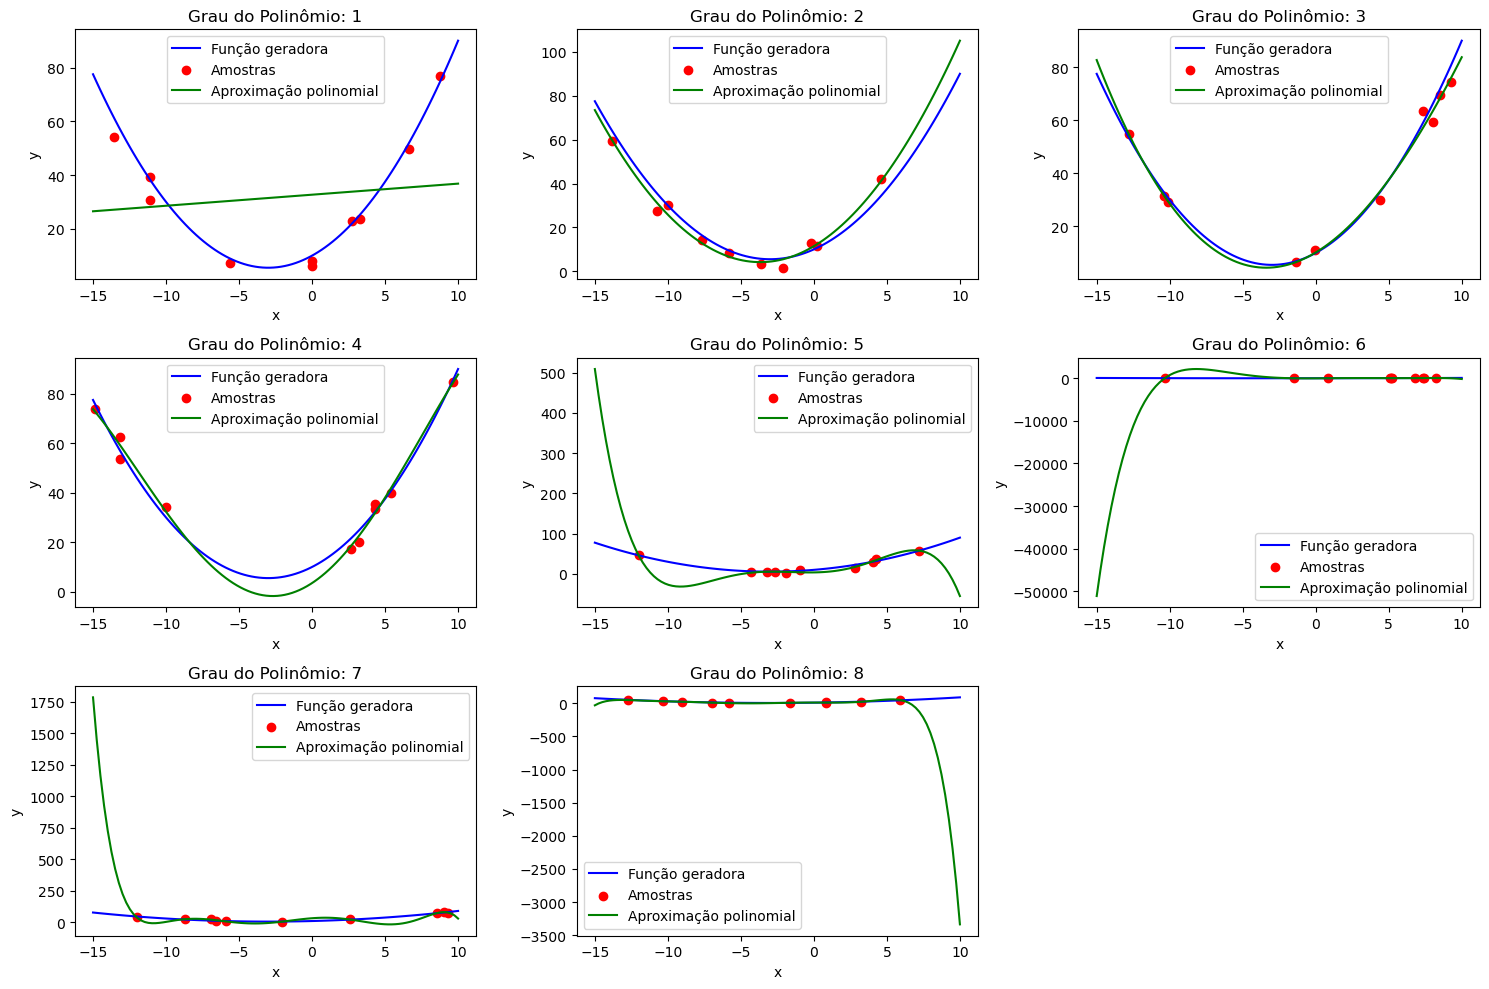

In [6]:
# Setando os parâmetros dados na atividade
np.random.seed(42)

m, sd = 0, 4  # Média e desvio padrão do ruído gaussiano
N = 10  # Número de amostras
p_values = range(1, 9)  # Grau do polinômio variando de 1 a 8
x_values = np.linspace(-15, 10, 100)  # Valores de x para plotagem 

# Gerando dados e plotando para cada grau de polinômio
plt.figure(figsize=(15, 10))
for i, p in enumerate(p_values, 1):
    # Gerando amostras
    x_samples = np.random.uniform(-15, 10, N)
    y_samples = f(x_samples) + np.random.normal(m, sd, N)

    # Ajustando o polinômio aos dados
    poly_features = PolynomialFeatures(degree=p)
    X_poly = poly_features.fit_transform(x_samples.reshape(-1, 1))
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, y_samples)

    # Preparando dados para plotagem
    x_plot = np.linspace(-15, 10, 100)
    X_plot_poly = poly_features.transform(x_plot.reshape(-1, 1))
    y_plot = lin_reg.predict(X_plot_poly)

    # Plotando
    plt.subplot(3, 3, i)
    plt.plot(x_values, f(x_values), label='Função geradora', color='blue')
    plt.scatter(x_samples, y_samples, label='Amostras', color='red')
    plt.plot(x_plot, y_plot, label='Aproximação polinomial', color='green')
    plt.title(f'Grau do Polinômio: {p}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()

plt.tight_layout()
plt.show()